In [ ]:
!pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 18.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("winequalityN.csv")
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.shape

(6497, 13)

In [ ]:
#Checking for null values
null_values = df.isnull().sum()
print(null_values)

#removing null values
new = df.dropna()
new

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:

new.shape

(6463, 13)

In [ ]:
import scipy.stats as stats

stats = new.describe()
stats

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,5.818505
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.873286
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [ ]:
new['type'].replace({'white': 1, 'red': 2}, inplace=True)
print(new)

      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        1            7.0             0.270         0.36            20.7   
1        1            6.3             0.300         0.34             1.6   
2        1            8.1             0.280         0.40             6.9   
3        1            7.2             0.230         0.32             8.5   
4        1            7.2             0.230         0.32             8.5   
...    ...            ...               ...          ...             ...   
6491     2            6.8             0.620         0.08             1.9   
6492     2            6.2             0.600         0.08             2.0   
6494     2            6.3             0.510         0.13             2.3   
6495     2            5.9             0.645         0.12             2.0   
6496     2            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         

<ipython-input-8-c04b0979579e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new['type'].replace({'white': 1, 'red': 2}, inplace=True)


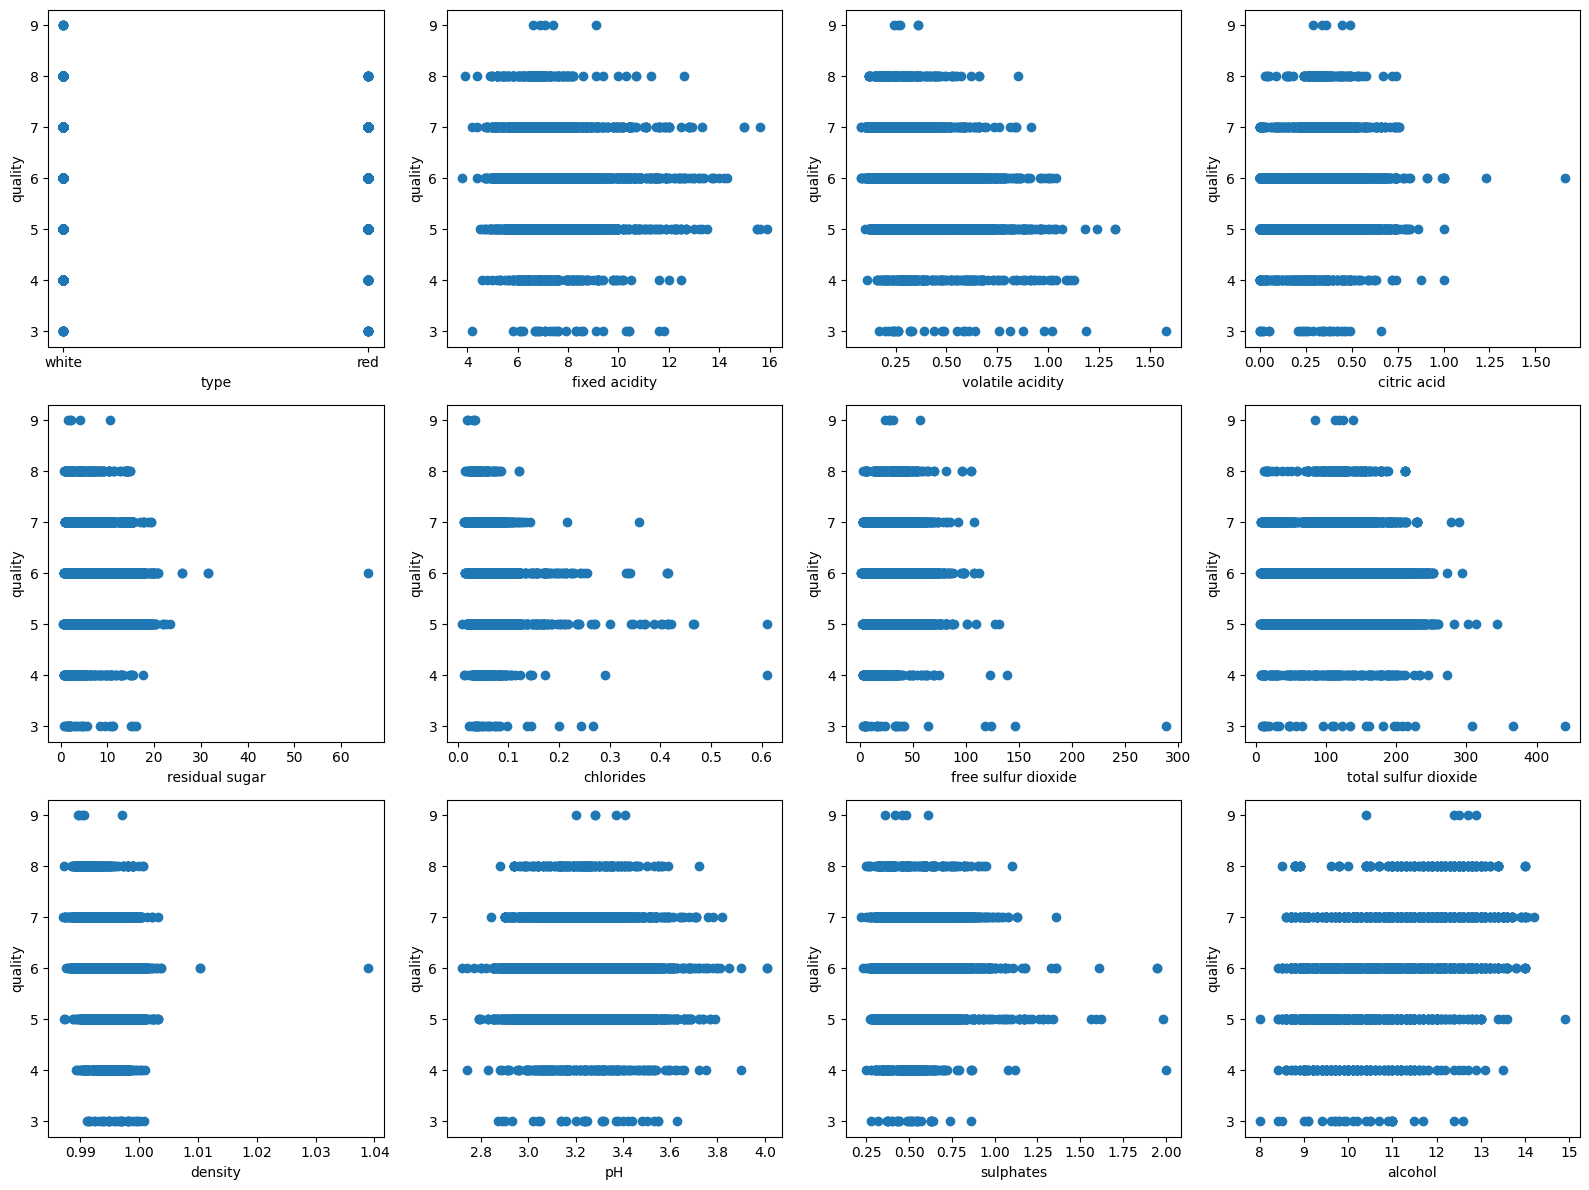

In [ ]:
import matplotlib.pyplot as plt

# Get the list of column names for the scatter plots
scatter_columns = df.columns[:-1]  # Exclude the 'quality' column

# Set up the figure and axes
fig, axs = plt.subplots(3, 4, figsize=(16, 12))  # Create a 3x4 grid of subplots

# Flatten the axs array to iterate over it easily
axs = axs.flatten()

# Iterate over each column and plot the corresponding scatter plot
for i, column in enumerate(scatter_columns):
    axs[i].scatter(df[column], df['quality'])
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('quality')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


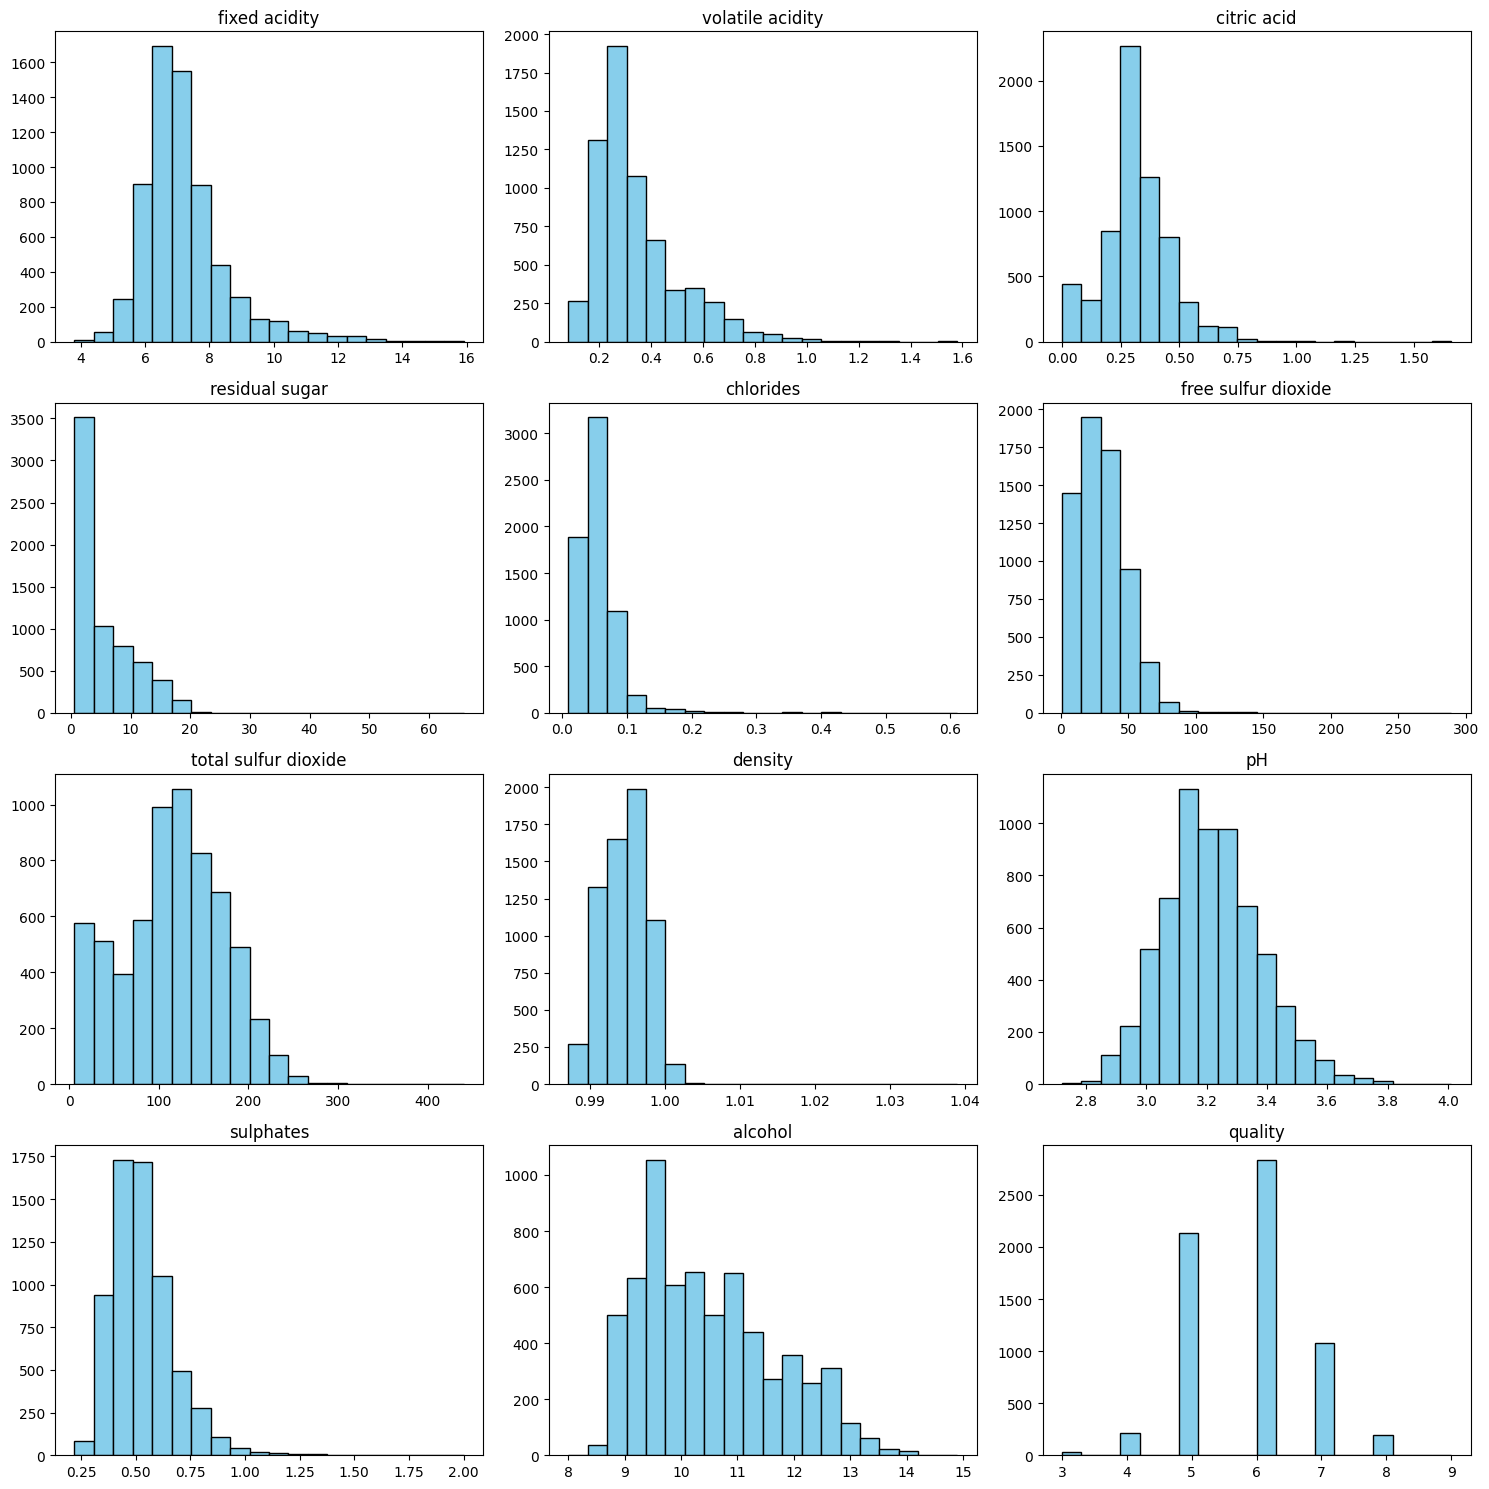

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axs = plt.subplots(4, 3, figsize=(15, 15))  # Create a 4x3 grid of subplots

# Flatten the axs array to iterate over it easily
axs = axs.flatten()

# Iterate over each variable and plot the corresponding histogram
for i, column in enumerate(df.columns[1:]):  # Start from index 1 to exclude 'type'
    axs[i].hist(df[column], bins=20, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
    axs[i].set_title(column)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

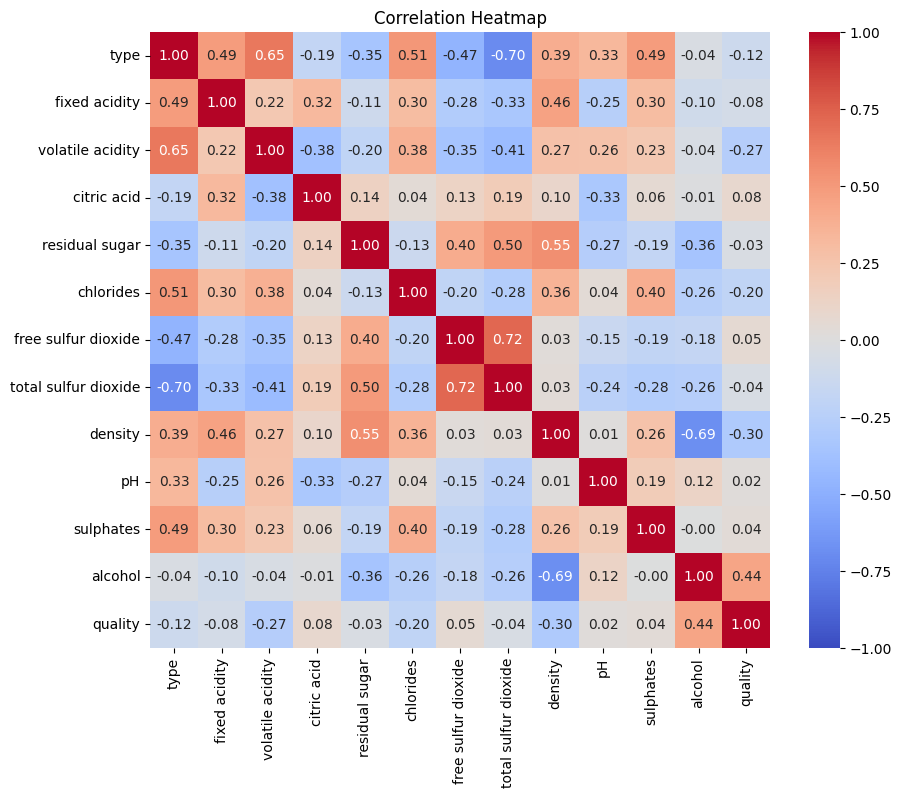

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = new.corr()
correlation_matrix


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",vmin = -1, vmax = 1)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
new.shape

(6463, 13)

In [ ]:
#Splitting into train and test data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = new.drop('quality', axis = 1)
y = new['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train)
print(y_train)

      type  fixed acidity  volatile acidity  citric acid  residual sugar  \
5201     2            7.4              0.67         0.12             1.6   
2681     1            7.2              0.19         0.27            11.2   
5541     2            9.5              0.59         0.44             2.3   
1110     1            7.2              0.37         0.15             2.0   
5406     2           10.0              0.59         0.31             2.2   
...    ...            ...               ...          ...             ...   
1981     1            7.6              0.20         0.30            14.2   
672      1            7.1              0.32         0.34            14.5   
2132     1            7.1              0.22         0.32            16.9   
1468     1            6.5              0.24         0.24             1.6   
288      1            7.2              0.23         0.39            14.2   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
5201      

In [ ]:
X.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
new.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [ ]:
new.shape

(6463, 13)

In [ ]:
new.value_counts()

type  fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality
1     7.0            0.150             0.28         14.7            0.051      29.0                 149.0                 0.99792  2.96  0.39       9.0      7          8
      7.3            0.190             0.27         13.9            0.057      45.0                 155.0                 0.99807  2.94  0.41       8.8      8          8
      6.8            0.180             0.30         12.8            0.062      19.0                 171.0                 0.99808  3.00  0.52       9.0      7          7
      7.4            0.160             0.30         13.7            0.056      33.0                 168.0                 0.99825  2.90  0.44       8.7      7          7
                     0.190             0.31         14.5            0.045      39.0                 193.0                 0.99860  3.10  0.50       9.2    

In [ ]:
X = new.drop('quality', axis=1)  # Assuming 'type' and 'quality' are not used as features
y = new['quality']


In [ ]:
new['quality'].value_counts()

quality
6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: count, dtype: int64

In [ ]:
X.shape

(6463, 12)

In [ ]:
y.shape

(6463,)

In [ ]:

# y.replace({'low': 0, 'medium': 1,'high':2}, inplace=True)
# print(y)

In [ ]:
y_train.shape

(4524,)

In [38]:
#SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE

# Separate features and target variable
X = new.drop('quality', axis=1)
y = new['quality']

# Assuming X and y are defined and hold your dataset features and target labels respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating a pipeline that includes scaling, feature selection, and classification
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', RFE(estimator=SVC(kernel="linear"))),
    ('svm', SVC())
])

# Parameter grid for GridSearchCV
param_grid = {
    'svm__C': [0.1, 1, 10],  # Example values, consider a wider range depending on your dataset
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__gamma': ['scale', 'auto'],  # Only relevant for 'rbf', 'poly', and 'sigmoid'
    'feature_selection__n_features_to_select': [5, 10, 15]  # Assuming you have many features; adjust accordingly
}

# Grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model after grid search
best_model = grid_search.best_estimator_

# Making predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Best Model Parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))


Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.5843218153687467
Best Model Parameters: {'feature_selection__n_features_to_select': 15, 'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.33      0.11      0.17        63
           5       0.66      0.63      0.65       652
           6       0.56      0.73      0.63       828
           7       0.52      0.33      0.41       327
           8       0.43      0.05      0.09        61
           9       1.00      0.00      0.00         1

    accuracy                           0.58      1939
   macro avg       0.50      0.26      0.28      1939
weighted avg       0.57      0.58      0.56      1939



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.5776173285198556
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.15      0.13      0.14        63
           5       0.66      0.64      0.65       652
           6       0.61      0.61      0.61       828
           7       0.49      0.52      0.50       327
           8       0.33      0.33      0.33        61
           9       0.00      0.00      0.00         1

    accuracy                           0.58      1939
   macro avg       0.32      0.32      0.32      1939
weighted avg       0.58      0.58      0.58      1939



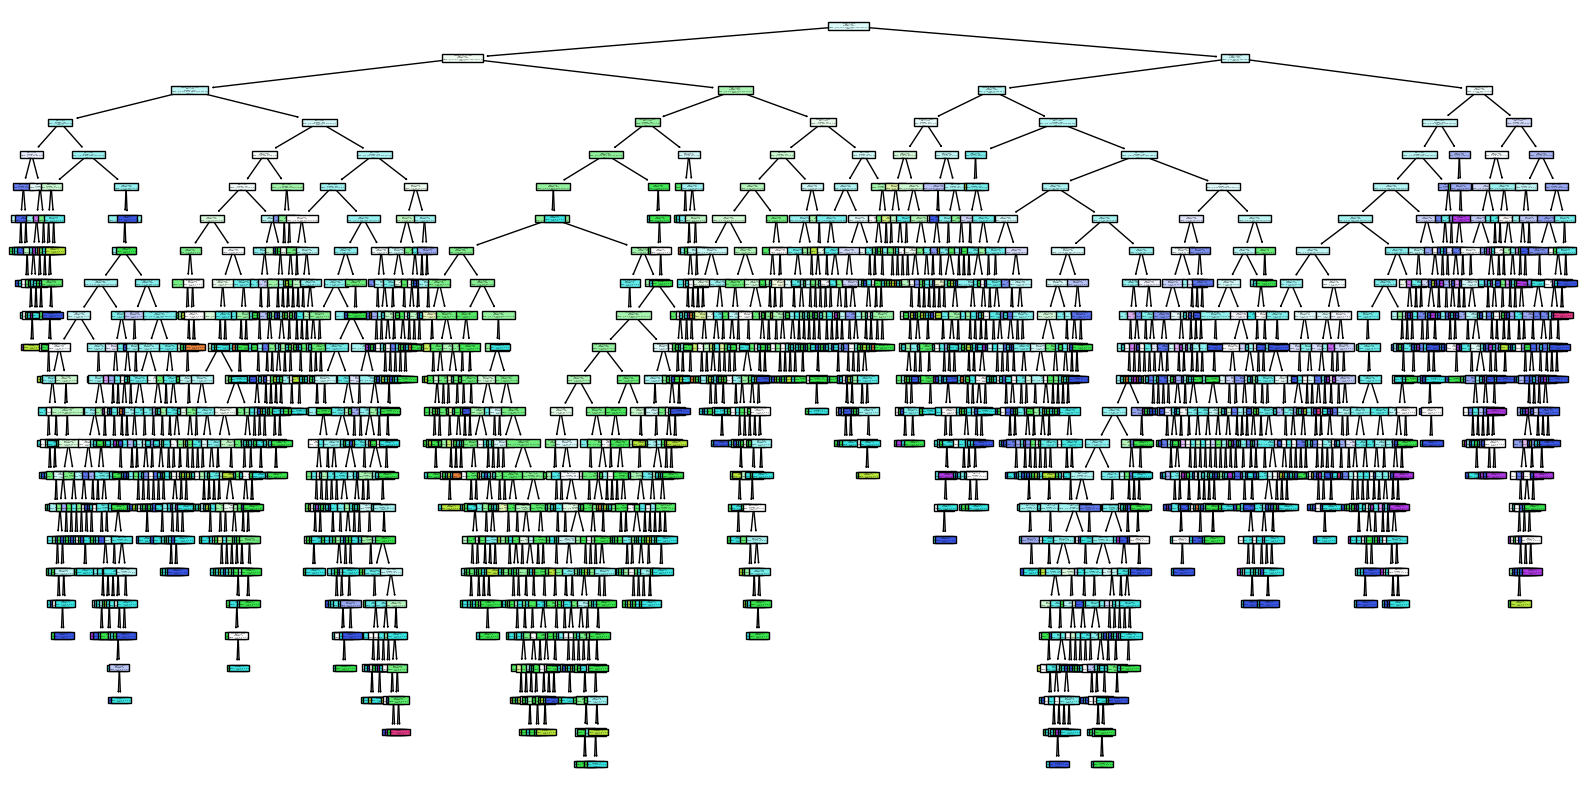

In [ ]:
#DecisionTree
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Assuming 'new' DataFrame is already loaded with 'quality' as the target variable
X = new.drop('quality', axis=1)
y = new['quality']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Setting up parameters for GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Create and configure the model
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Train the model using GridSearchCV to find the best parameters
grid_search.fit(X_train, y_train)
best_tree = grid_search.best_estimator_

# Make predictions and evaluate
y_pred = best_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=1)

# Output the results
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# Plotting the decision tree with best parameters
plt.figure(figsize=(20, 10))
plot_tree(best_tree, filled=True, feature_names=X.columns, class_names=[str(label) for label in sorted(y.unique())])
plt.show()


In [ ]:
#logisticRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Define features and target variable
X = new.drop('quality', axis=1)
y = new['quality']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)


Accuracy: 0.5466735430634347
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.45      0.08      0.14        63
           5       0.63      0.57      0.59       652
           6       0.51      0.73      0.60       828
           7       0.50      0.25      0.33       327
           8       0.00      0.00      0.00        61
           9       0.00      0.00      0.00         1

    accuracy                           0.55      1939
   macro avg       0.30      0.23      0.24      1939
weighted avg       0.53      0.55      0.52      1939



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
#RandomForest
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'new' is your DataFrame
# Encode the 'type' column if it's categorical
if 'type' in new.columns and new['type'].dtype == 'object':
    encoder = LabelEncoder()
    new['type'] = encoder.fit_transform(new['type'])

# Handle missing values if there are any
new.dropna(inplace=True)

# Separate features and target variable
X = new.drop('quality', axis=1)
y = new['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the Random Forest Classifier
rfc = RandomForestClassifier(random_state=42)

# Setting up the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model from grid search
best_rf = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


<ipython-input-34-f56b2ae314d7>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.dropna(inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.6642599277978339
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.38      0.05      0.08        63
           5       0.73      0.71      0.72       652
           6       0.63      0.78      0.69       828
           7       0.65      0.48      0.55       327
           8       0.95      0.30      0.45        61
           9       0.00      0.00      0.00         1

    accuracy                           0.66      1939
   macro avg       0.47      0.33      0.36      1939
weighted avg       0.66      0.66      0.65      1939



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


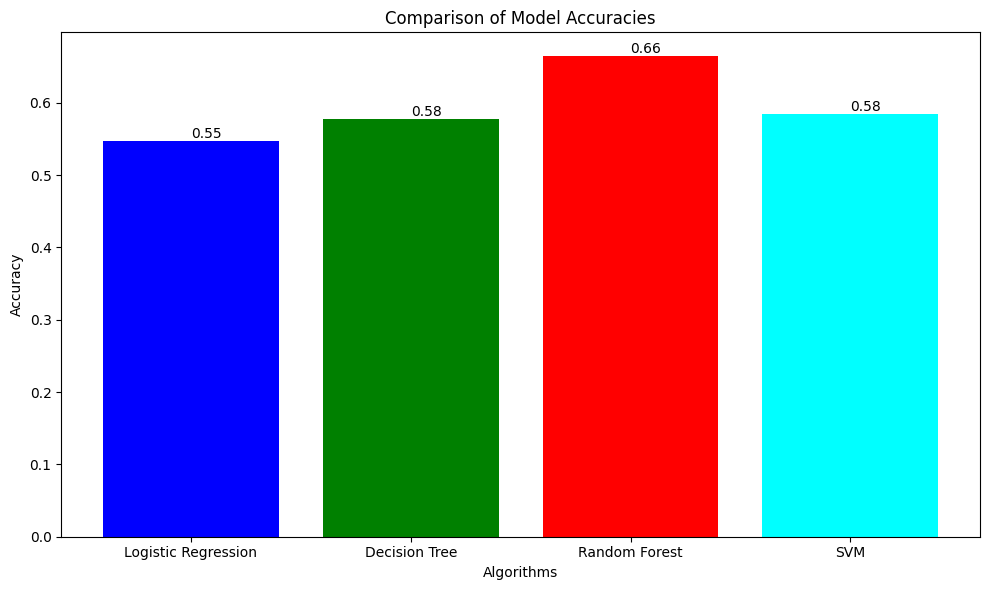

In [39]:
import matplotlib.pyplot as plt

accuracies = {
    'Logistic Regression': 0.5466735430634347,
    'Decision Tree': 0.5776173285198556,
    'Random Forest': 0.6642599277978339,
    'SVM': 0.5843218153687467
}

# Create lists of the dictionary data
algorithms = list(accuracies.keys())
accuracy_scores = list(accuracies.values())

# Create a bar chart to compare the accuracy
plt.figure(figsize=(10, 6))
bars = plt.bar(algorithms, accuracy_scores, color=['blue', 'green', 'red', 'cyan'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')

# Adding the accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval, 2), va='bottom')

# Show the plot
plt.tight_layout()
plt.show()
